# Predict the loan sanction amount 

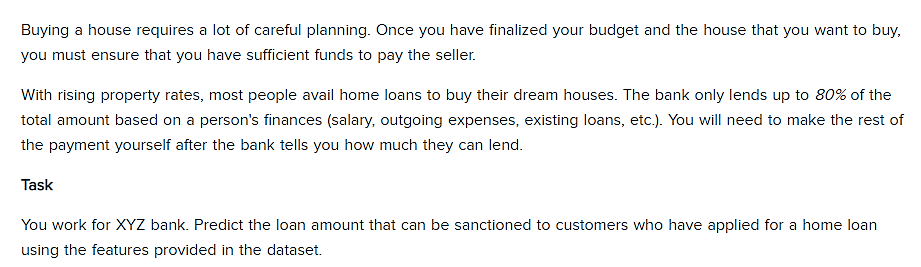

In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


# Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [3]:
# import data
df_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cipla/dfb5e5f2c9bc11eb/dataset/train.csv')
df_train.head(4)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54


In [4]:
# Check attributes of data.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [5]:
# Check statistical values of columns
df_train.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091407e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


  - train.info() --> we can see that there are total 24 columns with 30000 row entries in our dataset.
  - Our dataset has float64(8), int64(5), object(11) dtypes.
  - We observe that there are some negative values available in our dataset.
  - Before moving forward to modeling it's really important to clean our data

# Data Cleaning

In [6]:
# Check Null value in data
print(f"Missing Values :\n{df_train.isnull().sum()}")

Missing Values :
Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


- There are many null values in our dataset. 
- Our first step is remove all null values in dataset.

In [7]:
# Insert only non-null value in 'df' variable.
df = df_train[df_train['Loan Sanction Amount (USD)'].notna()]
df = df_train[df_train['Property Location'].notna()]

In [8]:
# Rename Loan Sanction Amount (USD).
df.rename(columns={'Loan Sanction Amount (USD)': 'Loan_Sanction_Amount'},inplace=True)

In [9]:
# Drop null values from 'Loan_Sanction_Amount', 'Income Stability' column
df.dropna(subset=['Loan_Sanction_Amount', 'Income Stability'], how='any',axis=0,inplace=True)
# There are some negative values as well as 0 values available in attributes. Hence we have to remove it.
df = df[df['Loan_Sanction_Amount'] >= 0 ]
df = df[df.Loan_Sanction_Amount != 0]
df = df[df['Current Loan Expenses (USD)'] >= 0 ]
df = df[df['Property Price'] >= 0 ]
df = df[df['Co-Applicant'] >= 0 ]
# df.head(20)

In [10]:
# Remove unneccesary attributes.
df.drop(['Name', 'Gender','Type of Employment','Location','Has Active Credit Card','Property Age'], axis=1,inplace=True)

- we can not remove null values because numer of null value are very large in size.
- In that case we replace null values by using some statistical method called 'Interpolate'
- Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

In [11]:
# Handle missing values in Income (USD)
df['Income (USD)'].interpolate(axis = 0,inplace=True)
df['Credit Score'].interpolate(axis = 0,inplace=True)
df['Dependents'].fillna(0, inplace=True)

In [12]:
# Check negative values available or not in 'min' row.
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Type,Co-Applicant,Property Price,Loan_Sanction_Amount
count,19127.000000,1.912700e+04,19127.000000,19127.000000,19127.000000,19127.000000,19127.000000,19127.000000,19127.000000,19127.000000,1.912700e+04,19127.000000
mean,40.398076,2.688935e+03,91603.411756,416.187343,2.049302,758.432179,0.193235,500.457103,2.459717,0.949914,1.376171e+05,65989.571801
std,16.224642,1.294839e+04,60919.193653,222.761920,1.105265,61.836580,0.394846,287.411433,1.118577,0.218129,9.530711e+04,45005.524356
min,18.000000,3.787600e+02,6108.050000,33.760000,0.000000,620.080000,0.000000,1.000000,1.000000,0.000000,7.439120e+03,4023.180000
25%,25.000000,1.692902e+03,42135.905000,254.550000,1.000000,706.725000,0.000000,249.000000,1.000000,1.000000,6.406102e+04,30363.845000
50%,40.000000,2.285110e+03,77252.460000,381.810000,2.000000,756.800000,0.000000,500.000000,2.000000,1.000000,1.146381e+05,55163.840000
75%,56.000000,3.115680e+03,124045.785000,530.565000,3.000000,808.925000,0.000000,748.000000,3.000000,1.000000,1.865405e+05,89225.865000
max,65.000000,1.777460e+06,602384.150000,3840.880000,10.000000,896.260000,1.000000,999.000000,4.000000,1.000000,1.028083e+06,481907.320000


In [13]:
# Check null values.
print(f"Missing Values :\n{df.isnull().sum()}")

Missing Values :
Customer ID                    0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Property ID                    0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan_Sanction_Amount           0
dtype: int64


- So finally we have cleaned our data.
- It's always good practise to save clean data in .csv file.

In [14]:
# Save clean data in .csv file format.
df.to_csv('sample.csv')

# Data Analysis

- Now it's time to find pattern from the data.
- The below code is customised python code which we are going to use detail analysis of our attributes.

In [15]:
class DataFrame_Info():
    def __init__(self):
        print("Attribute information")
    
    def Attribute_information(self,df):
        """
        This method give us the basic information of all the attributes like count of attributes,number of rows & columns,numerical attributes and categorical attributes and so on
        """
        
        data_info=pd.DataFrame(columns=['No of observation',
                                       'No of variables',
                                       'No of Numerical variables',
                                       'No of Factor variables',
                                       'No of Categorival variables',
                                       'No of Logical variables',
                                       'No of Date Variables',
                                       'No of zero variance variables'])
        
        data_info.loc[0,'No of observation']=df.shape[0]

        data_info.loc[0,'No of variables']=df.shape[1]
        
        data_info.loc[0,'No of Numerical variables']=df._get_numeric_data().shape[1]
        
        data_info.loc[0,'No of Factor variables']=df.select_dtypes(include='category').shape[1]
        
        data_info.loc[0,'No of Categorival variables']=df.select_dtypes(include='object').shape[1]
        
        data_info.loc[0,'No of Logical variables']=df.select_dtypes(include='bool').shape[1]
        
        data_info.loc[0,'No of Date Variables']=df.select_dtypes(include='datetime64').shape[1]
        
        data_info.loc[0,'No of zero variance variables']=df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]
        
        data_info=data_info.transpose()
        
        data_info.columns=['value']
        
        
        
        return data_info
    
    def __get_missing_values(self,data):
        
        """
        It is a private method ,so it cannot accesed by object outsid ethe class.This function will give us a basic information like count of missing values
        """
        
        #Getting sum of missing values for each feature
        missing_values=data.isnull().sum()
        #Feature missing values are ssorted from few to many
        missing_values.sort_values(ascending=False,inplace=True)
        #get the missing values
        return missing_values
    
    def Agg_Tabulation(self,data):
        """
        This method is a extension of additional inforamtion like about the data like Entrophy value,missing value percentage and some observations
        """
        
        print('='*100)
        print('Aggrgation of Table')
        
        table=pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1=pd.DataFrame(data.columns,columns=['Names'])
        table=table.reset_index()
        table=table.rename(columns={'index':'Name'})
        table['No of missing']=data.isnull().sum().values
        table['No of unique']=data.nunique().values
        table['Percent of missing']=((data.isnull().sum().values)/(data.shape[0]))*100
        table['First Observation']=data.loc[0].values
        table['Second observation']=data.loc[1].values
        table['Third Observation']=data.loc[2].values
        
    
        return table
        
        
        print('*'*100)
        print('Interquartile Range')
    def _iqr(self,x):
        """
        It is a private method return you a interquartile range
        """
            
        return x.quantile(q=0.75)-x.quantile(q=0.25)
        
    def __outlier_count(self,x):
        """
        It is a private method which return you a outliers present in a interquartile range
        """
        upper_out=x.quantile(q=0.75)+1.5 * self._iqr(x)
        lower_out=x.quantile(q=0.25)-1.5 * self._iqr(x)
            
        return len(x[x > upper_out])+len(x[x < lower_out])
    def num_count_summary(self,df):
        """
        This method which returns you basci information about Numerica variable like Positive values,Negitive Vlues,Unique Count,Zero count positive and negitive,infiniyt-count and count of outliers
        """
            
        df_num=df._get_numeric_data()
        data_info_num=pd.DataFrame()
        i=0
        for c in df_num.columns:
            data_info_num.loc[c,'Negitive values']=df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c,'Positive values']=df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c,'Zero values']=df_num[df_num[c]== 0].shape[0]
            data_info_num.loc[c,'Unique_count']=len(df_num[c].unique())
            data_info_num.loc[c,'Negitive_infinity_count']=df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive_infinity_count']=df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Percentage of miisning values']=df_num[df_num[c].isnull()].shape[0]/df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']=self.__outlier_count(df_num[c])
            i= i+1
        return data_info_num
    def statstical_summary(self,df):
        """
        This method which return you a various percentile of the data including count and mean
        """
        df_num=df._get_numeric_data()
        data_stat_num=pd.DataFrame()
            
        try:
            data_stat_num=pd.concat([df_num.describe().transpose(),
                                        pd.DataFrame(df_num.quantile(q=0.1)),
                                        pd.DataFrame(df_num.quantile(q=0.90)),
                                        pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns=['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass
        return data_stat_num

In [16]:
#Intialize the dataframe object
dataframe=DataFrame_Info()

Attribute information


In [17]:
dataframe.Agg_Tabulation(df)

Aggrgation of Table


,Name,dtypes,No of missing,No of unique,Percent of missing,First Observation,Second observation,Third Observation
0,Customer ID,object,0,19127,0.0,C-36995,C-33999,C-3770
1,Age,int64,0,48,0.0,56,32,65
2,Income (USD),float64,0,18663,0.0,1933.05,4952.91,988.19
3,Income Stability,object,0,2,0.0,Low,Low,High
4,Profession,object,0,7,0.0,Working,Working,Pensioner
5,Loan Amount Request (USD),float64,0,19122,0.0,72809.6,46837.5,45593
6,Current Loan Expenses (USD),float64,0,16695,0.0,241.08,495.81,171.95
7,Expense Type 1,object,0,2,0.0,N,N,N
8,Expense Type 2,object,0,2,0.0,N,Y,Y
9,Dependents,float64,0,10,0.0,3,1,1


In [18]:
dataframe.Attribute_information(df)

,value
No of observation,19127
No of variables,18
No of Numerical variables,12
No of Factor variables,0
No of Categorival variables,6
No of Logical variables,0
No of Date Variables,0
No of zero variance variables,0


In [19]:
dataframe.num_count_summary(df)

,Negitive values,Positive values,Zero values,Unique_count,Negitive_infinity_count,Positive_infinity_count,Percentage of miisning values,Count of outliers
Age,0.0,19127.0,0.0,48.0,0.0,0.0,0.0,0.0
Income (USD),0.0,19127.0,0.0,18663.0,0.0,0.0,0.0,830.0
Loan Amount Request (USD),0.0,19127.0,0.0,19122.0,0.0,0.0,0.0,451.0
Current Loan Expenses (USD),0.0,19127.0,0.0,16695.0,0.0,0.0,0.0,447.0
Dependents,0.0,17385.0,1742.0,10.0,0.0,0.0,0.0,7.0
Credit Score,0.0,19127.0,0.0,13294.0,0.0,0.0,0.0,0.0
No. of Defaults,0.0,3696.0,15431.0,2.0,0.0,0.0,0.0,3696.0
Property ID,0.0,19127.0,0.0,999.0,0.0,0.0,0.0,0.0
Property Type,0.0,19127.0,0.0,4.0,0.0,0.0,0.0,0.0
Co-Applicant,0.0,18169.0,958.0,2.0,0.0,0.0,0.0,958.0


In [20]:
dataframe.statstical_summary(df)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
Age,19127.0,40.398076,16.224642,18.00,25.000000,40.00,56.000,65.00,18.000,63.000,65.000
Income (USD),19127.0,2688.935367,12948.390068,378.76,1692.901667,2285.11,3115.680,1777460.21,1277.556,4144.500,5006.677
Loan Amount Request (USD),19127.0,91603.411756,60919.193653,6108.05,42135.905000,77252.46,124045.785,602384.15,27938.990,176128.840,208630.285
Current Loan Expenses (USD),19127.0,416.187343,222.761920,33.76,254.550000,381.81,530.565,3840.88,169.240,704.666,809.877
Dependents,19127.0,2.049302,1.105265,0.00,1.000000,2.00,3.000,10.00,1.000,4.000,4.000
Credit Score,19127.0,758.432179,61.836580,620.08,706.725000,756.80,808.925,896.26,674.080,845.114,859.424
No. of Defaults,19127.0,0.193235,0.394846,0.00,0.000000,0.00,0.000,1.00,0.000,1.000,1.000
Property ID,19127.0,500.457103,287.411433,1.00,249.000000,500.00,748.000,999.00,102.000,898.000,947.000
Property Type,19127.0,2.459717,1.118577,1.00,1.000000,2.00,3.000,4.00,1.000,4.000,4.000
Co-Applicant,19127.0,0.949914,0.218129,0.00,1.000000,1.00,1.000,1.00,1.000,1.000,1.000


In [21]:
#load the categorical data in to the "cat_data" and get the patterns inside of the categorical data
cat_data=df.select_dtypes(include="object")
cat_data.head()

,Customer ID,Income Stability,Profession,Expense Type 1,Expense Type 2,Property Location
0,C-36995,Low,Working,N,N,Rural
1,C-33999,Low,Working,N,Y,Rural
2,C-3770,High,Pensioner,N,Y,Urban
3,C-26480,High,Pensioner,N,Y,Semi-Urban
4,C-23459,Low,Working,N,Y,Semi-Urban


In [22]:
#Check the values in each variables inside of the categorical data
def value_cat(var,cat_data):
  print("*"*15+var+"*"*15)
  print(cat_data[var].value_counts())

In [23]:
for _ in cat_data.columns:
  value_cat(_,cat_data)

***************Customer ID***************
C-385      1
C-26857    1
C-37183    1
C-34978    1
C-6526     1
          ..
C-14718    1
C-1310     1
C-49333    1
C-39909    1
C-38126    1
Name: Customer ID, Length: 19127, dtype: int64
***************Income Stability***************
Low     17058
High     2069
Name: Income Stability, dtype: int64
***************Profession***************
Working                 10354
Commercial associate     5130
Pensioner                2068
State servant            1572
Businessman                 1
Unemployed                  1
Maternity leave             1
Name: Profession, dtype: int64
***************Expense Type 1***************
N    12326
Y     6801
Name: Expense Type 1, dtype: int64
***************Expense Type 2***************
Y    13088
N     6039
Name: Expense Type 2, dtype: int64
***************Property Location***************
Semi-Urban    6688
Rural         6499
Urban         5940
Name: Property Location, dtype: int64


In [24]:
# create variable having categorical column name
columns_to_do_plot=cat_data[['Income Stability', 'Profession', 'Expense Type 1', 'Expense Type 2','Property Location']]

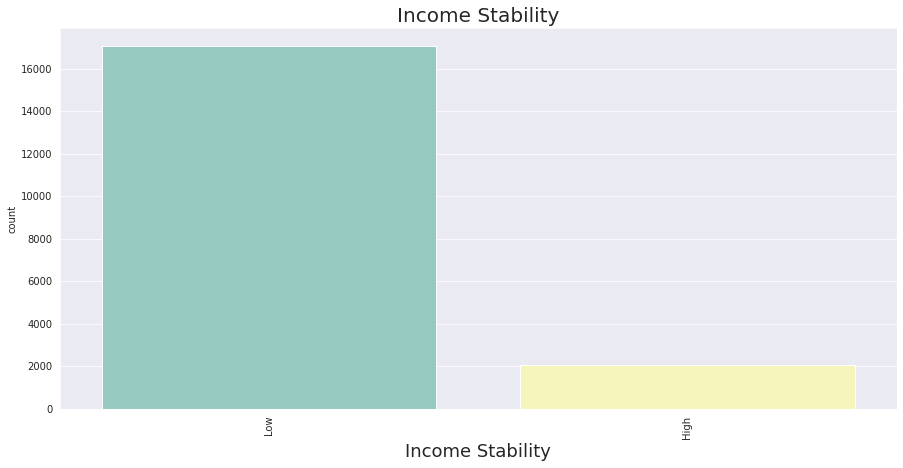

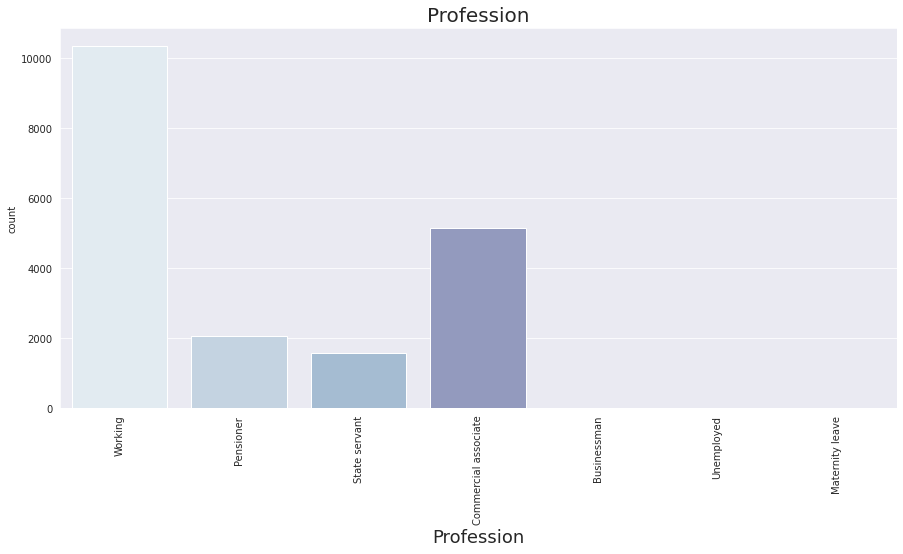

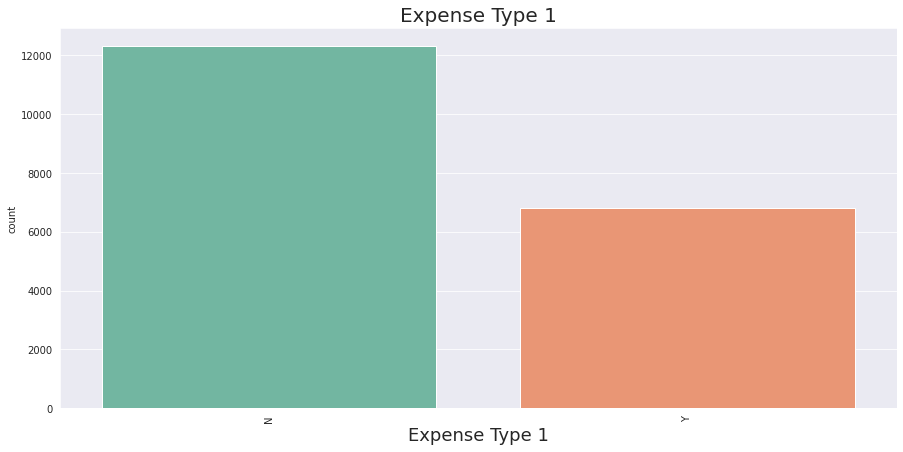

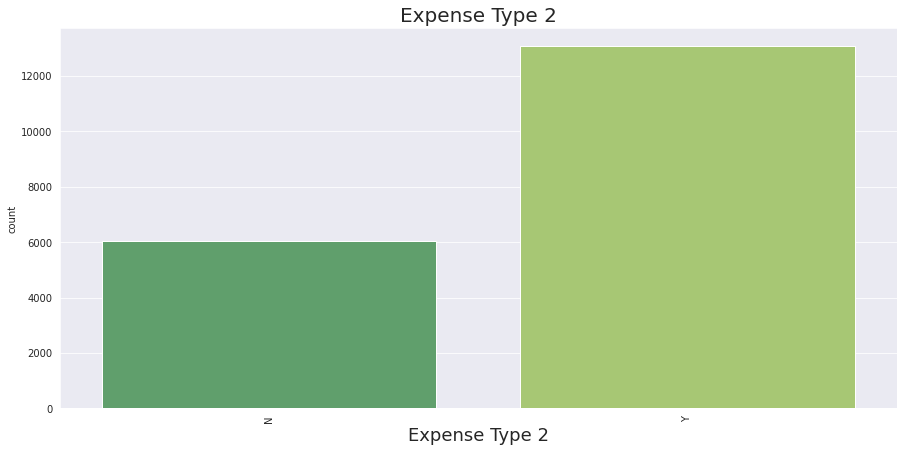

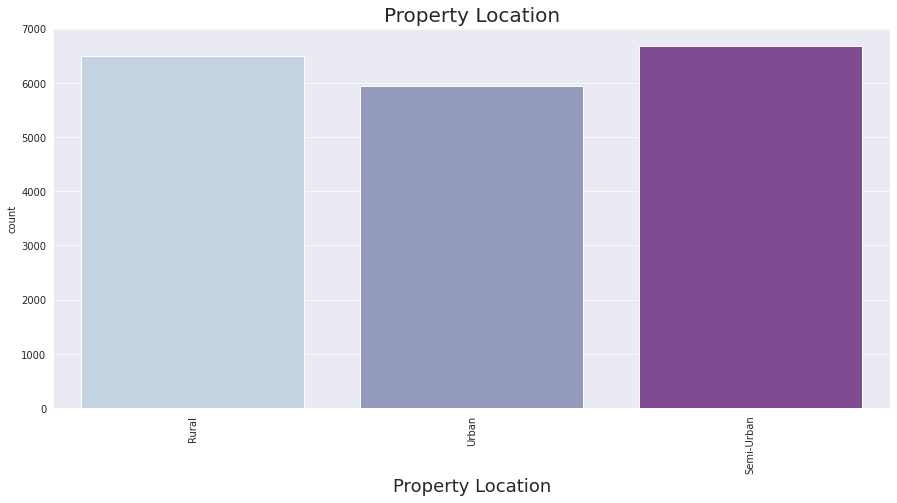

In [25]:
#Visualize the categories with the help of bar plot
import random
for i in columns_to_do_plot.columns:
  for j in random.choices(['summer','viridis','Set1','Set2','Set3','BuPu','inferno']):
    plt.figure(figsize=(15,7))
    sns.set_style('darkgrid')
    g=sns.countplot(x=i,data=cat_data,palette=j)
    g.set_xlabel(i,fontsize=18)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    g.set_title(i,fontsize=20)
    plt.show()

- Most of the client has low income stability.
- Our dataset has higher number of working clients.

Text(0.5, 1.0, 'Density or Relative Frequency Of Loan By Price')

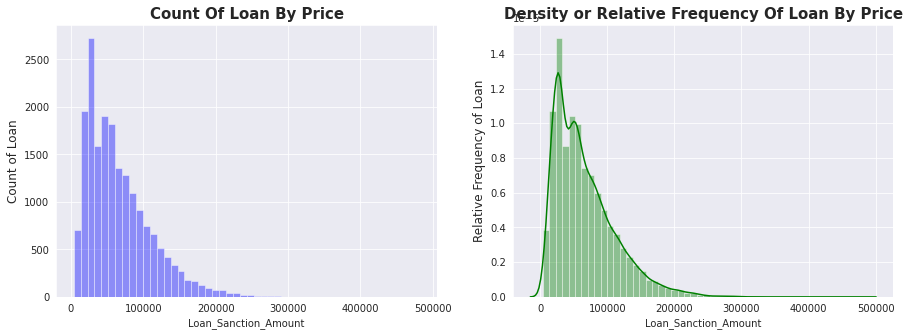

In [26]:
# target variable: Loan_Sanction_Amount

fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(df['Loan_Sanction_Amount'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Loan_Sanction_Amount')
ax[0].set_ylabel('Count of Loan',size=12)
ax[0].set_title('Count Of Loan By Price',size=15,weight="bold")

sns.distplot(df['Loan_Sanction_Amount'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Loan_Sanction_Amount')
ax[1].set_ylabel('Relative Frequency of Loan',size=12)
ax[1].set_title('Density or Relative Frequency Of Loan By Price',size=15,weight="bold")

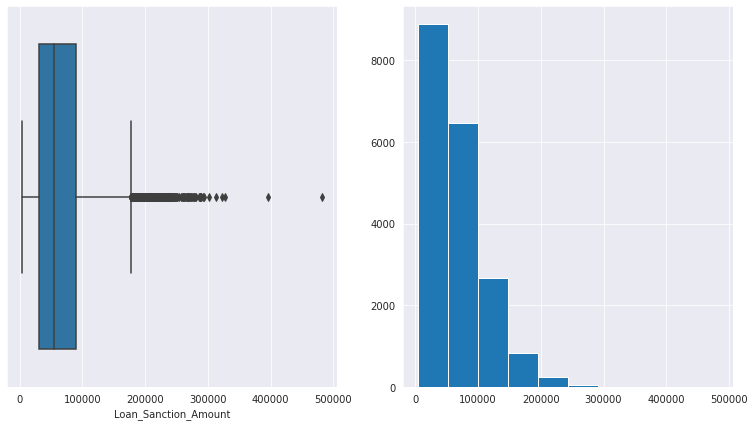

In [27]:
#Check the distribution of the Price column
fig,ax=plt.subplots(1,2,figsize=(13,7))
df["Loan_Sanction_Amount"].hist(ax=ax[1])
sns.boxplot(x=df['Loan_Sanction_Amount'],ax=ax[0])

We can observe that our Loan_Sanction_Amount column show's right skewness we need to handle by using feature transformation techniques else it will impact on our model perfromance, most of the Loan_Sanction_Amount data is falling on Left side show's right skewness. also our Loan_Sanction_Amount column has so many outliers we need to take care of that by using IQR method.



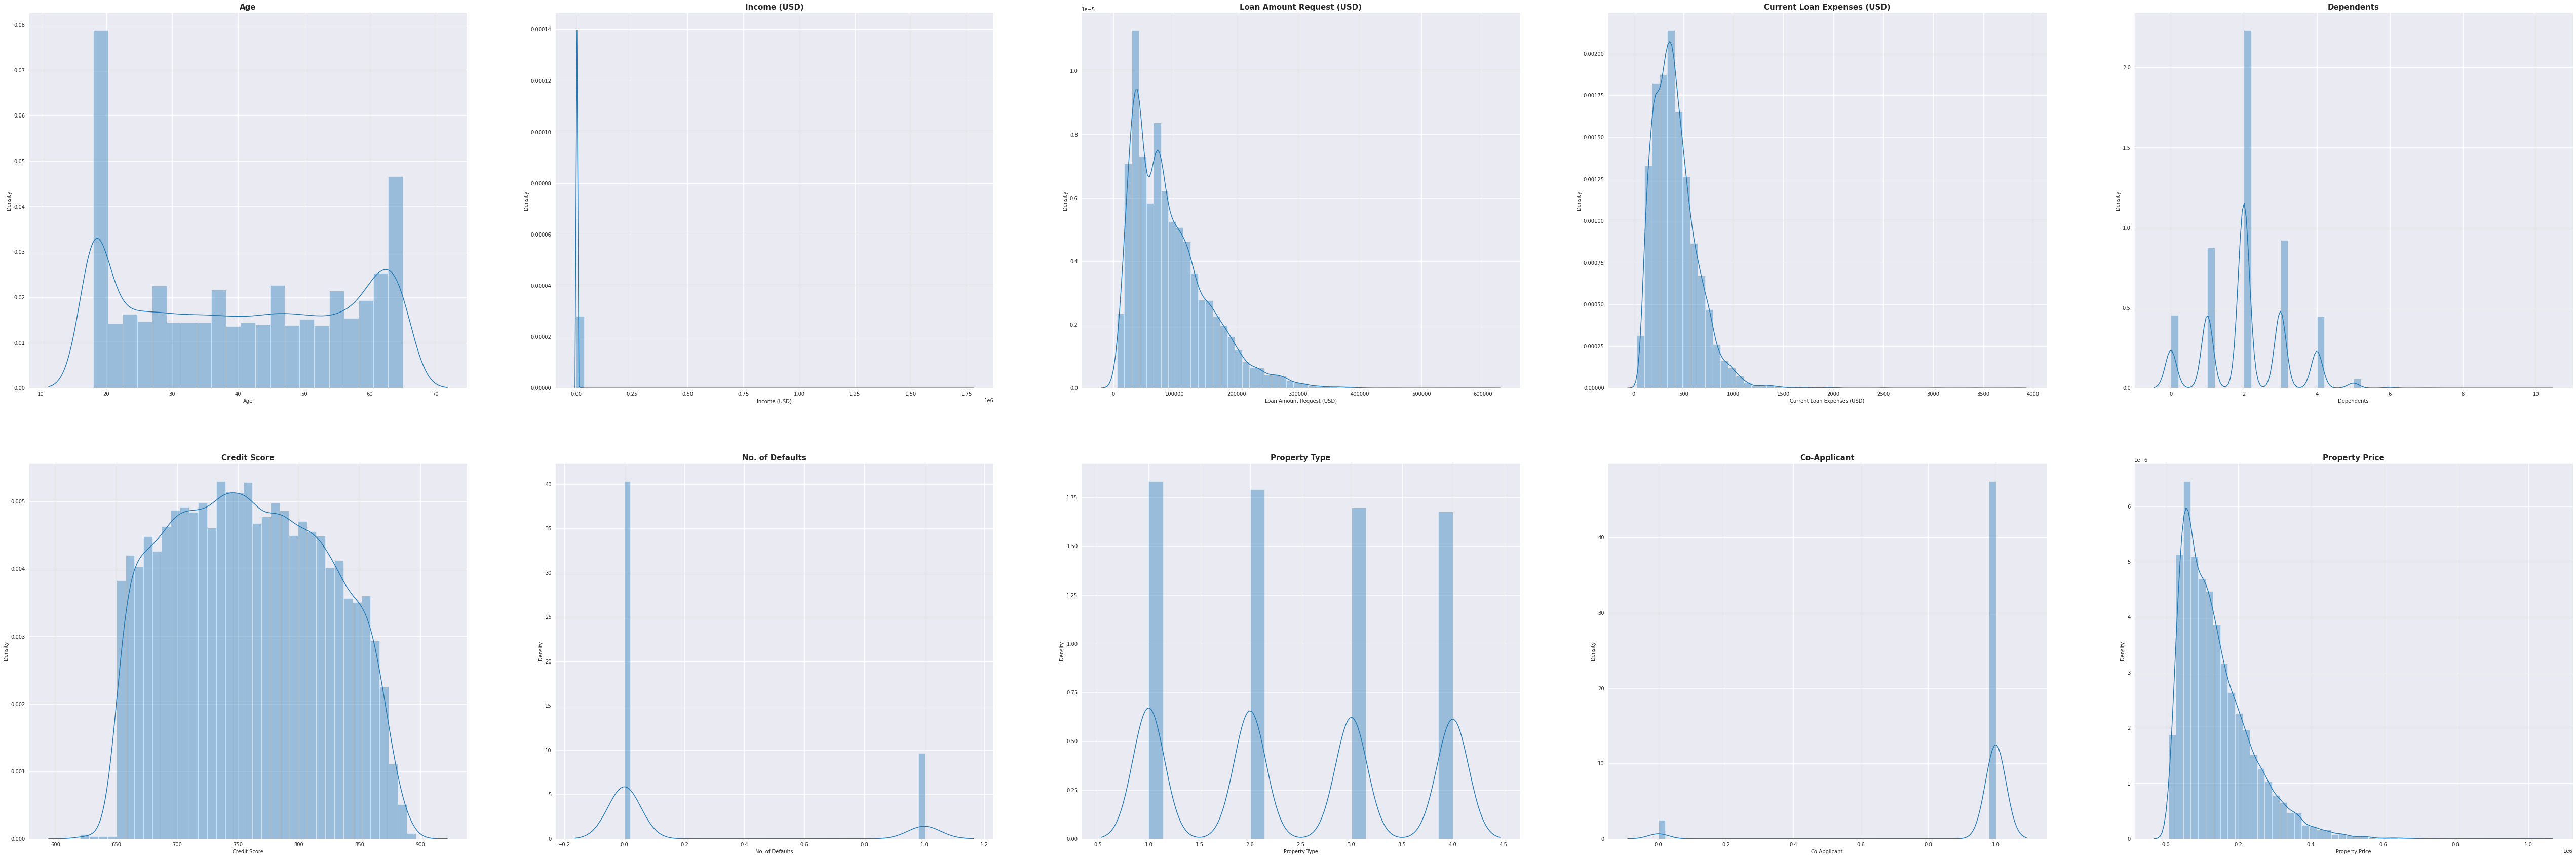

In [28]:
# Check skewness of other features as well.
fig, ax= plt.subplots(2,5,figsize=(90,30))
sns.distplot(df['Age'],ax=ax[0,0])
sns.distplot(df['Income (USD)'],ax=ax[0,1])
sns.distplot(df['Loan Amount Request (USD)'],ax=ax[0,2])
sns.distplot(df['Current Loan Expenses (USD)'],ax=ax[0,3])
sns.distplot(df['Dependents'],ax=ax[0,4])
sns.distplot(df['Credit Score'],ax=ax[1,0])
sns.distplot(df['No. of Defaults'],ax=ax[1,1])
sns.distplot(df['Property Type'],ax=ax[1,2])
sns.distplot(df['Co-Applicant'],ax=ax[1,3])
sns.distplot(df['Property Price'],ax=ax[1,4])

ax[0,0].set_title('Age',size=15,weight="bold")
ax[0,1].set_title('Income (USD)',size=15,weight="bold")
ax[0,2].set_title('Loan Amount Request (USD)',size=15,weight="bold")
ax[0,3].set_title('Current Loan Expenses (USD)',size=15,weight="bold")
ax[0,4].set_title('Dependents',size=15,weight="bold")
ax[1,0].set_title('Credit Score',size=15,weight="bold")
ax[1,1].set_title('No. of Defaults',size=15,weight="bold")
ax[1,2].set_title('Property Type',size=15,weight="bold")
ax[1,3].set_title('Co-Applicant',size=15,weight="bold")
ax[1,4].set_title('Property Price',size=15,weight="bold")
plt.show()

- We found that right skewness in 'Loan Amount Request (USD)' ,'Current Loan Expenses (USD)' and 'Property Price' columns.
- We need to treat them otherwise it will create problem in model prediction

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

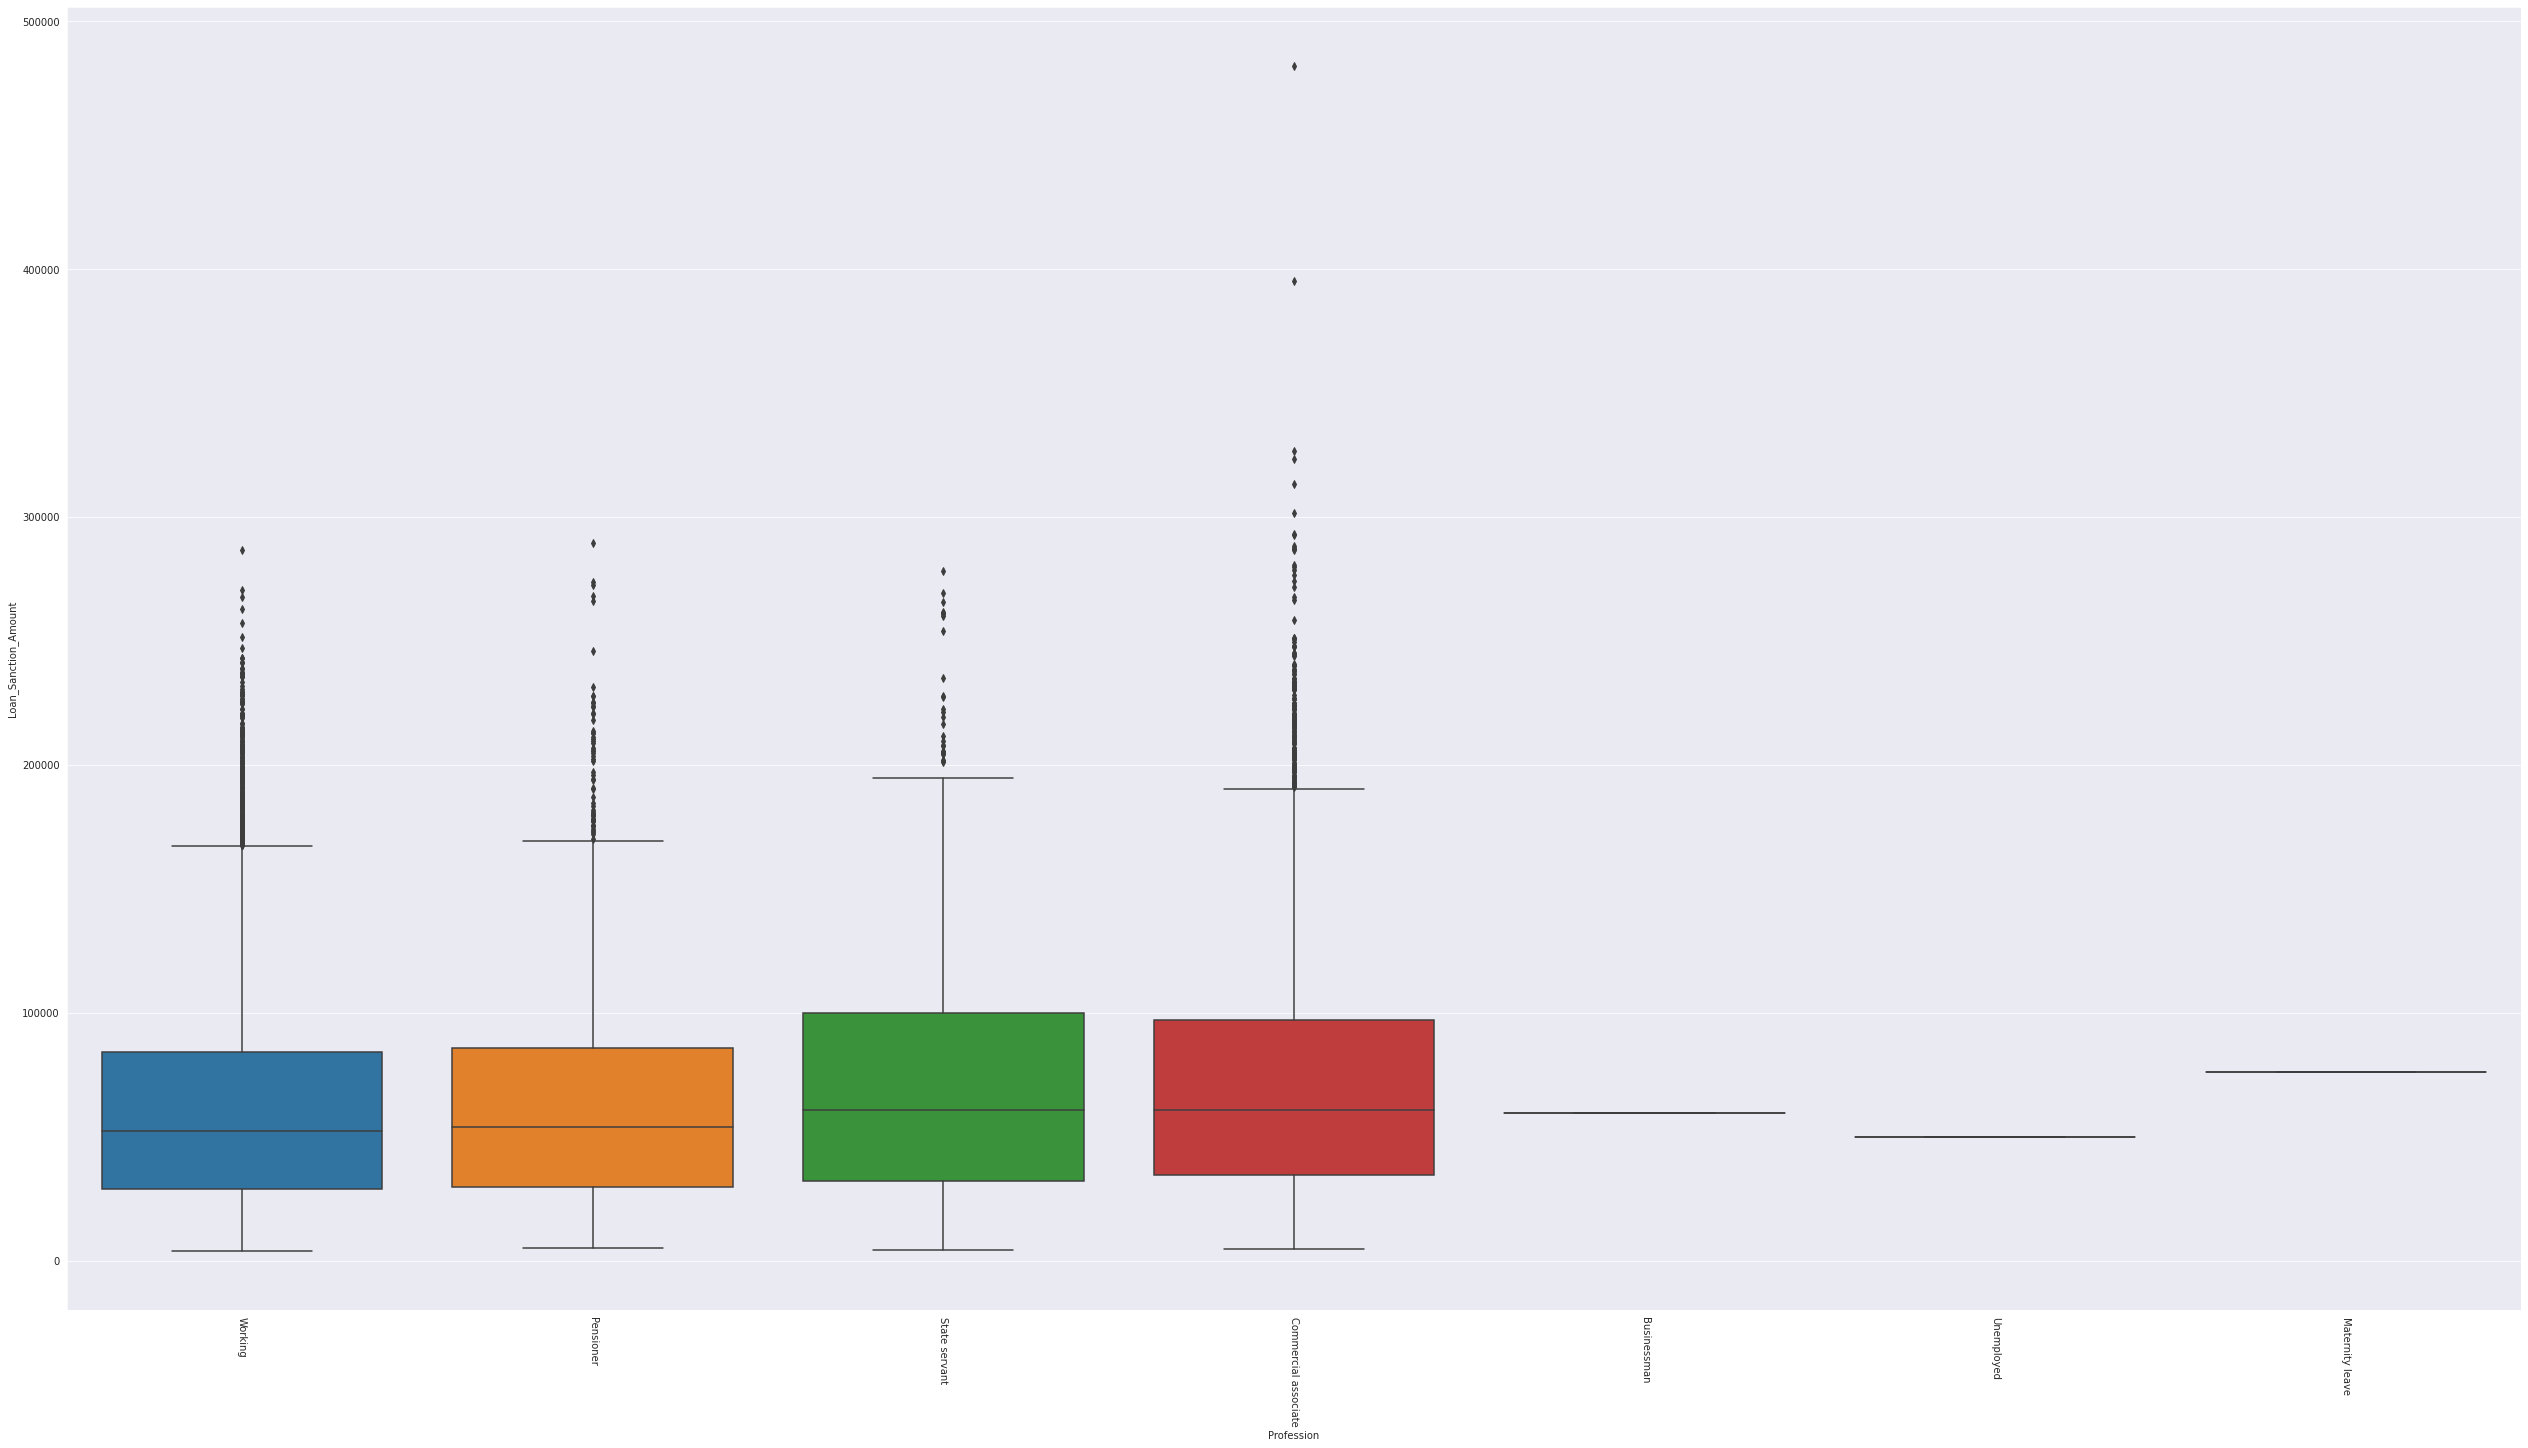

In [29]:
# Check outliers in our dataset.
fig, ax= plt.subplots(1,figsize=(35,20),constrained_layout=True)
ax = sns.boxplot(x="Profession", y="Loan_Sanction_Amount", data=df)
plt.xticks(rotation=-90)

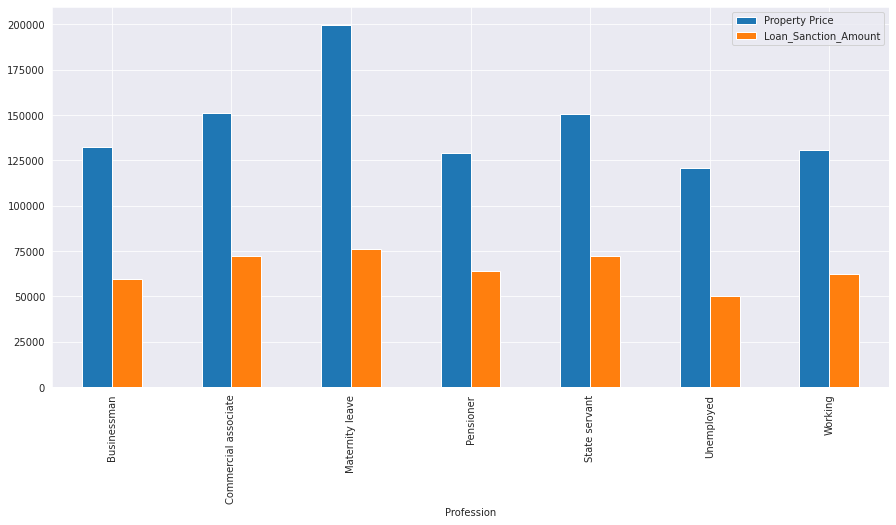

In [30]:
# loan snction amount vs property price 
ddr=df.groupby("Profession")[["Property Price","Loan_Sanction_Amount"]].mean()
ddr.plot.bar(figsize=(15,7))

In [31]:
#Encode the values in categorical data in to the numerical 
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df["Income Stability"]=lc.fit_transform(df['Income Stability'])
df["Profession"]=lc.fit_transform(df['Profession'])
df["Expense Type 1"]=lc.fit_transform(df['Expense Type 1'])
df["Expense Type 2"]=lc.fit_transform(df['Expense Type 2'])
df["Property Location"]=lc.fit_transform(df['Property Location'])

As of Now I have converted all categorical values in to the numerical with the help of label encoder based on the model perfromance so we can check again insights of data.

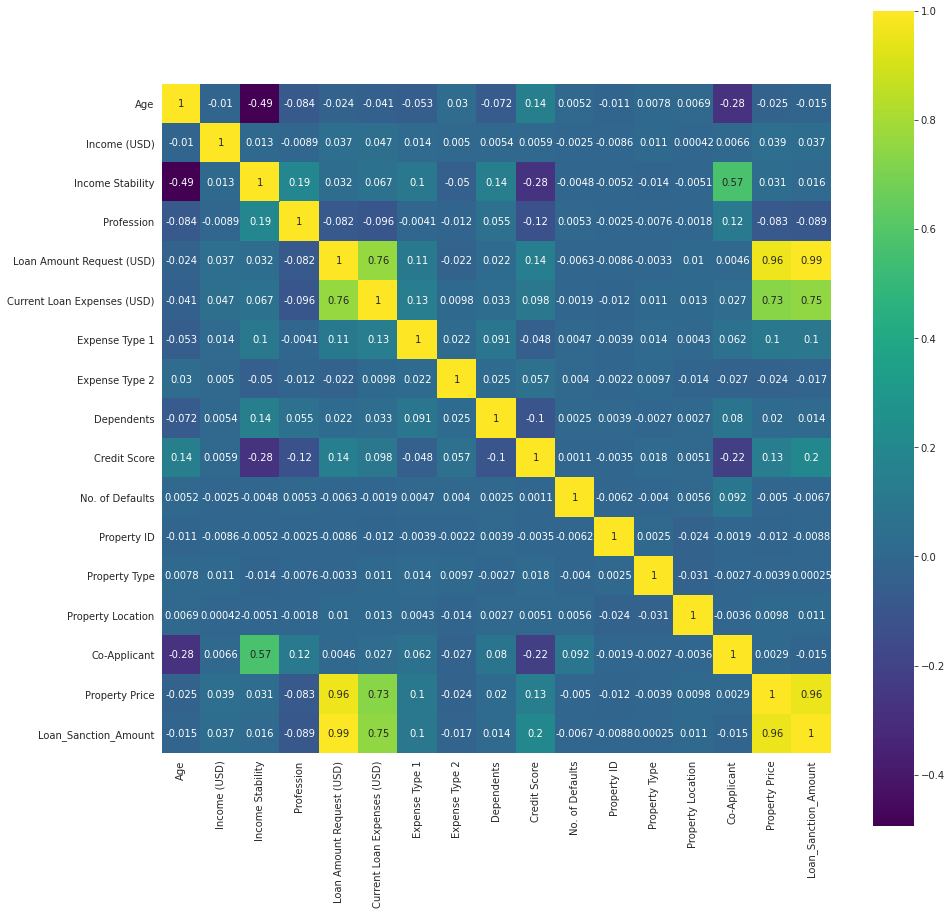

In [32]:
# Find correlation using HeatMap method.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="viridis",square=True)
plt.show()

- There are correlation in between property price , Loan amount request (USD) and Current loan expences (USD) column.
- But according to home loan bank agreement the above attributes are very very important. Hence we can not drop there columns.
- Unlike the correaltion, it will not alway affact the power of prediction of model. So for now we can keep as it is. 

In [33]:
#Split the data in to the x and y
x=df.drop(["Loan_Sanction_Amount","Customer ID"],1)
y=df['Loan_Sanction_Amount']

In [34]:
# See our dataset
df.head(4)

,Customer ID,Age,Income (USD),Income Stability,Profession,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Property ID,Property Type,Property Location,Co-Applicant,Property Price,Loan_Sanction_Amount
0,C-36995,56,1933.05,1,6,72809.58,241.08,0,0,3.0,809.44,0,746,4,0,1,119933.46,54607.18
1,C-33999,32,4952.91,1,6,46837.47,495.81,0,1,1.0,780.40,0,608,2,0,1,54791.00,37469.98
2,C-3770,65,988.19,0,3,45593.04,171.95,0,1,1.0,833.15,0,546,2,2,0,72440.58,36474.43
3,C-26480,65,1801.48,0,3,80057.92,298.54,0,1,2.0,832.70,1,890,2,1,1,121441.51,56040.54


In [35]:
#Feature selection by xgboost.
import xgboost
from xgboost import plot_importance
xgb=xgboost.XGBRegressor()
xgb.fit(x,y)


features=xgb.feature_importances_
columns=x.columns
for i,j in enumerate(features):
    print(columns[i],'--->',j)

[14:30:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Age ---> 0.0006674894
Income (USD) ---> 0.0008127163
Income Stability ---> 0.008994742
Profession ---> 0.001468928
Loan Amount Request (USD) ---> 0.95618093
Current Loan Expenses (USD) ---> 0.0010626703
Expense Type 1 ---> 0.00015903609
Expense Type 2 ---> 0.0
Dependents ---> 0.0015574093
Credit Score ---> 0.01906683
No. of Defaults ---> 0.00086961425
Property ID ---> 0.0011880345
Property Type ---> 5.4823144e-05
Property Location ---> 0.0
Co-Applicant ---> 0.0018237535
Property Price ---> 0.0060930117


Transformation of Features Why Transformation of Features Are Required?

Linear Regression---Gradient Descent ----Global Minima Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance Every Point has some vectors and Directiom

Types Of Transformation

Normalization And Standardization Scaling to Minimum And Maximum values Scaling To Median And Quantiles Guassian Transformation Logarithmic Transformation Reciprocal Trnasformation Square Root Transformation Exponential Trnasformation Box Cox Transformation Standardization We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

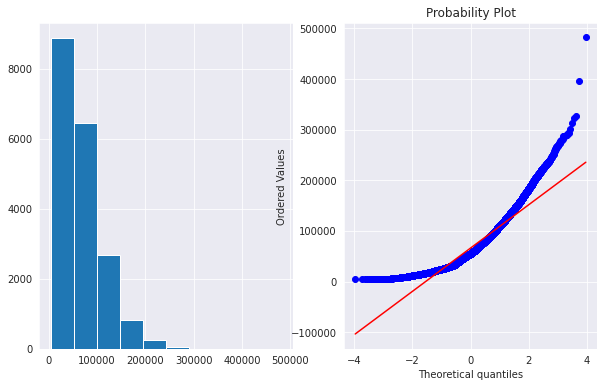

In [36]:
#Feature transformation on the Loan_Sanction_Amount column since it has so many outliers we need to handle that
df_2=df.copy()
import scipy.stats as stat
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df_2,"Loan_Sanction_Amount")

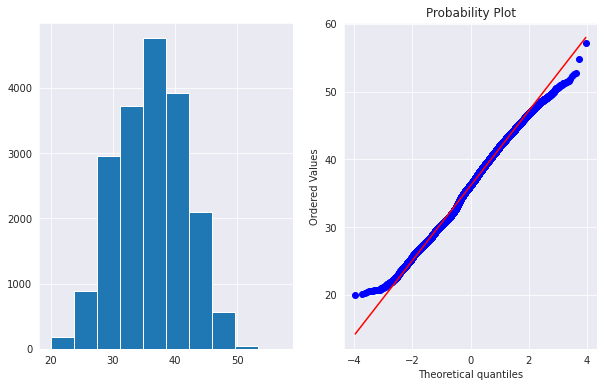

In [37]:
# Use boxcox transformation to rectify skewness.
df_2["Loan_Sanction_Amount"],para=stats.boxcox(df_2["Loan_Sanction_Amount"])
plot_data(df_2,"Loan_Sanction_Amount")

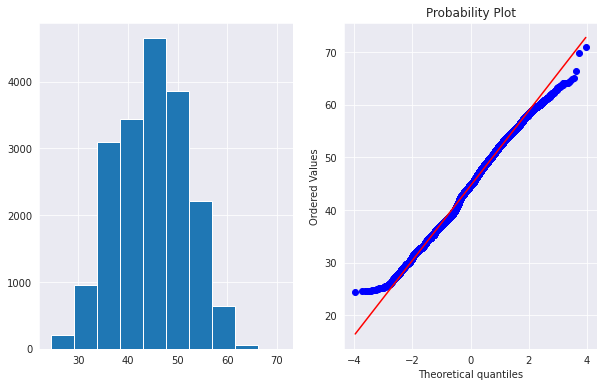

In [38]:
# We need to rectify skweness in Loan Amount Request (USD)
df_2["Loan Amount Request (USD)"],para=stats.boxcox(df_2["Loan Amount Request (USD)"])
plot_data(df_2,"Loan Amount Request (USD)")

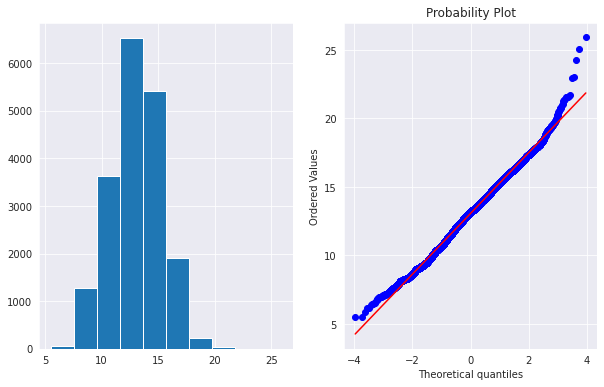

In [39]:
# We need to rectify skweness in Current Loan Expenses (USD)
df_2["Current Loan Expenses (USD)"],para=stats.boxcox(df_2["Current Loan Expenses (USD)"])
plot_data(df_2,"Current Loan Expenses (USD)")

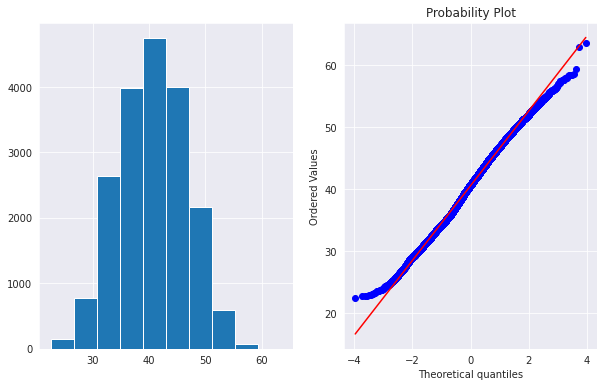

In [40]:
# We need to rectify skweness in Current Loan Expenses (USD)
df_2["Property Price"],para=stats.boxcox(df_2["Property Price"])
plot_data(df_2,"Property Price")

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

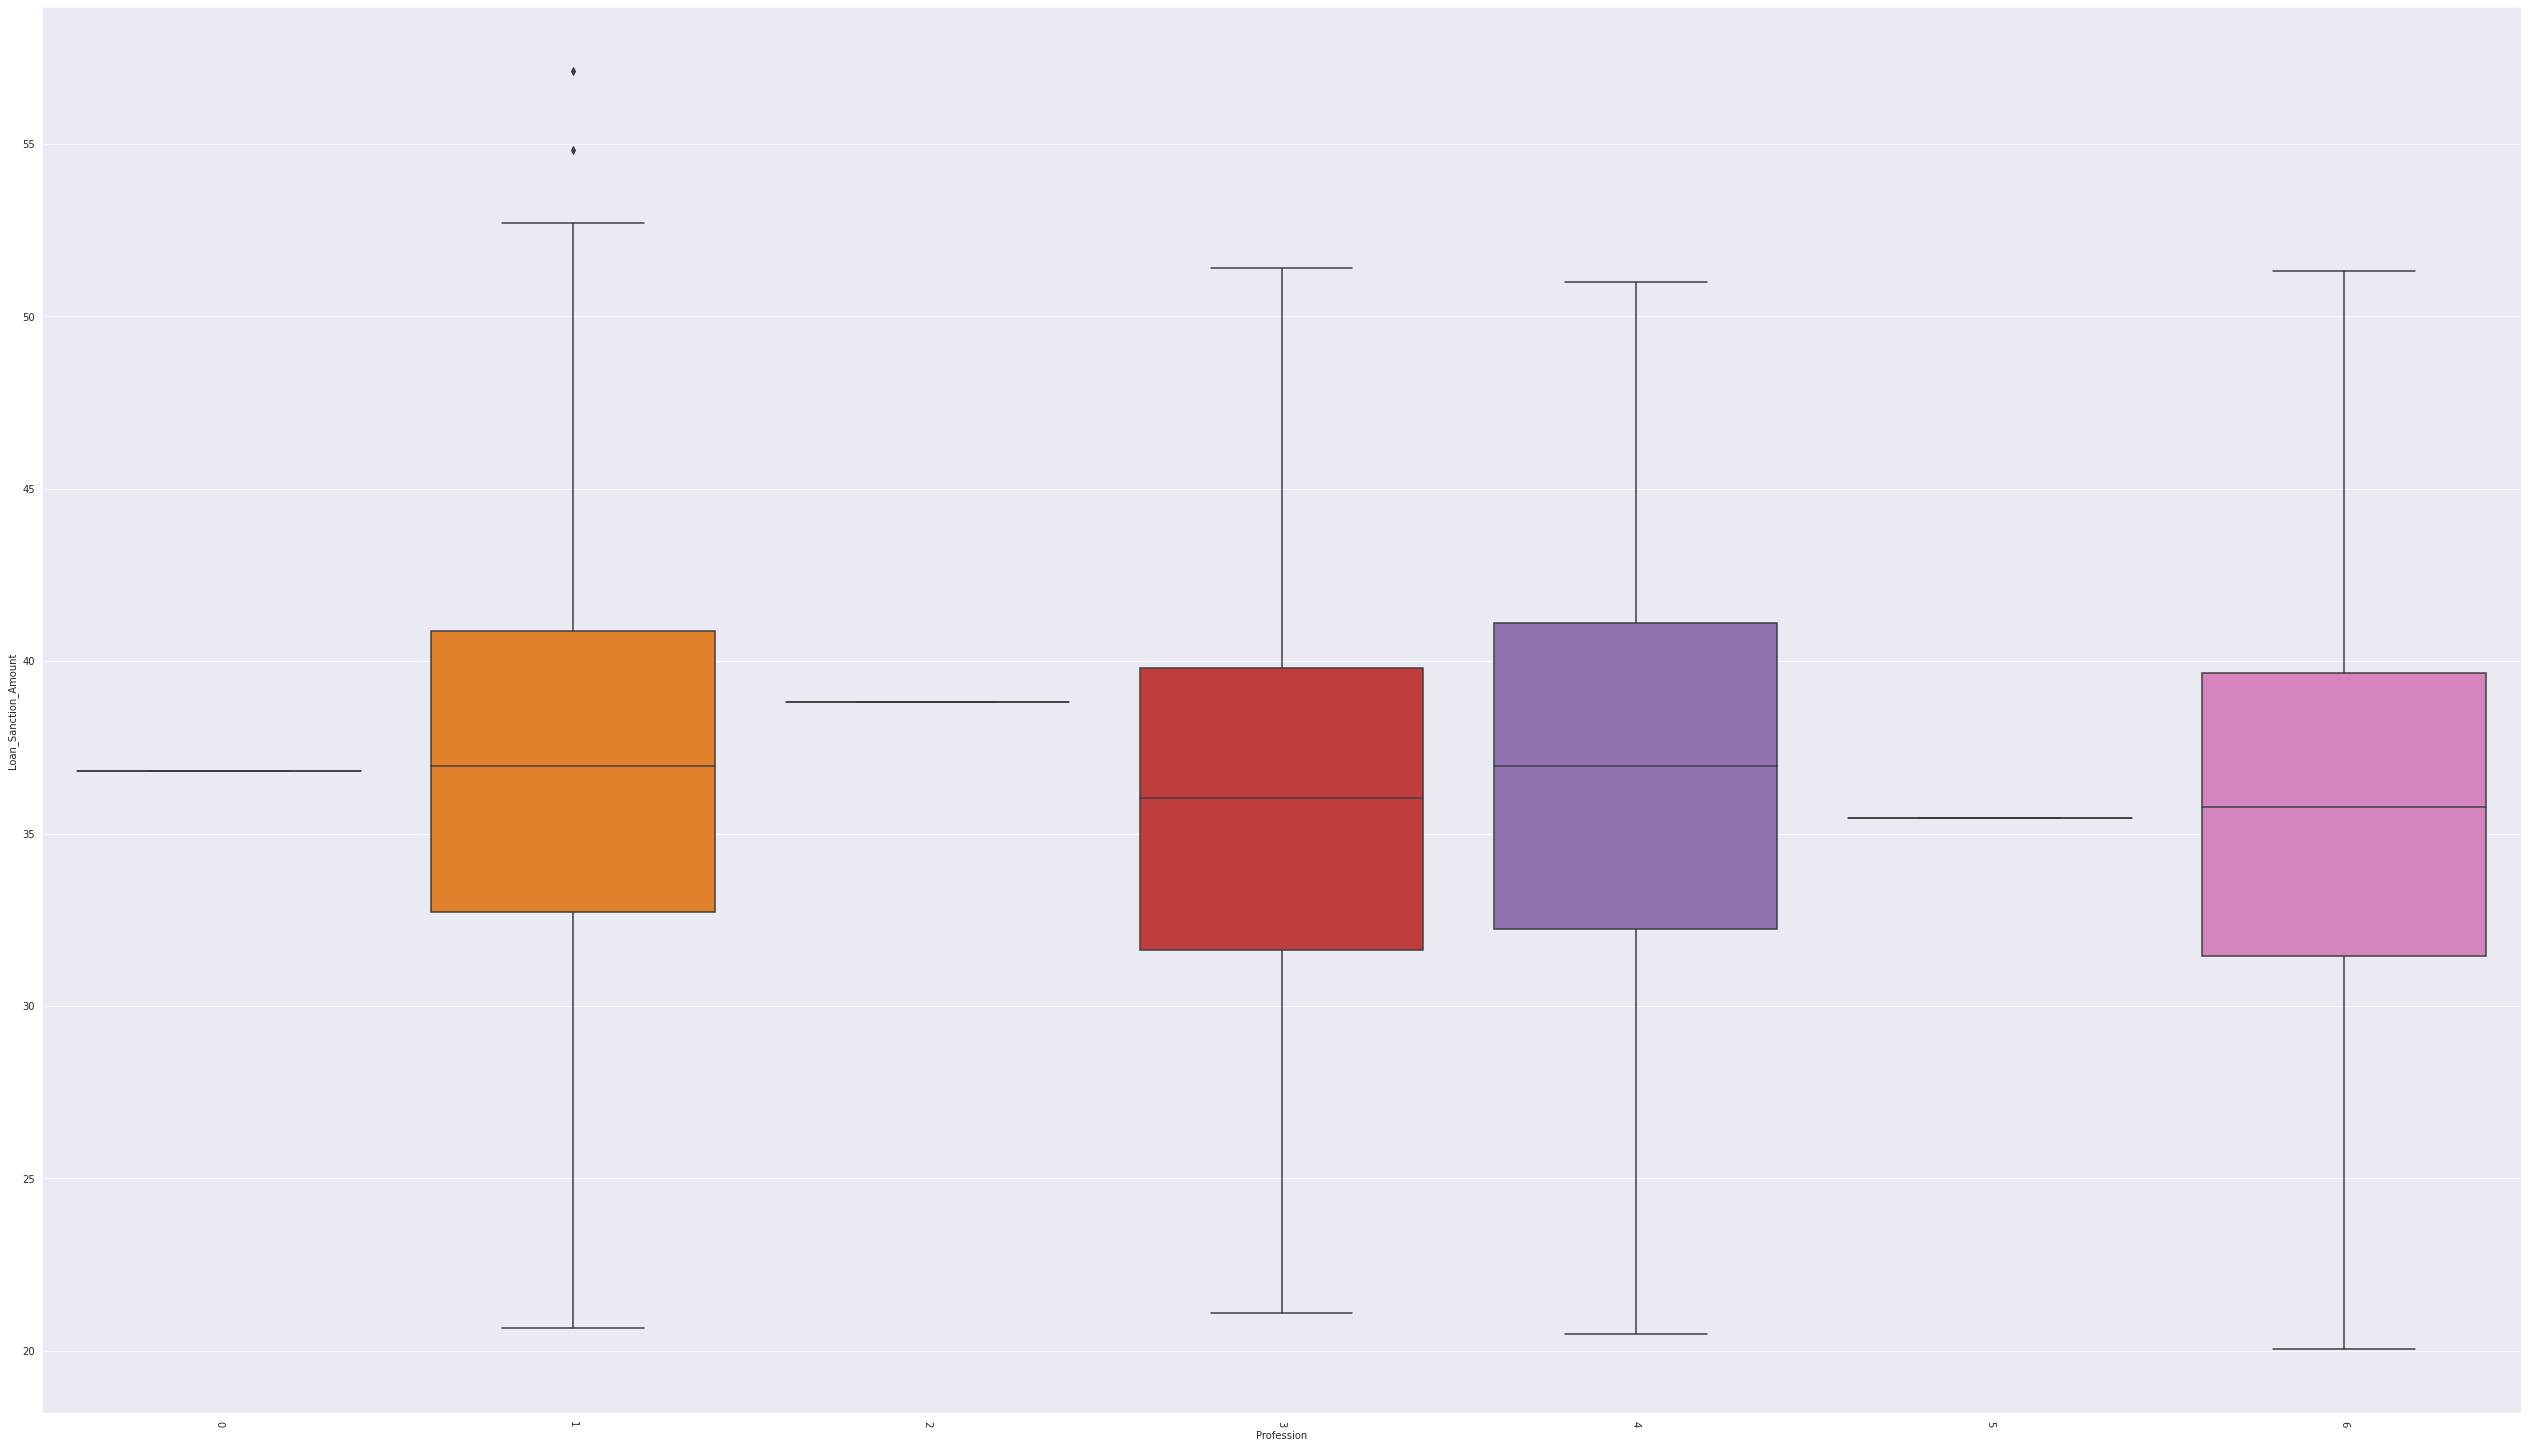

In [41]:
# After rectifying skweness now check outliers in our dataset
ig, ax= plt.subplots(1,figsize=(35,20),constrained_layout=True)
ax = sns.boxplot(x="Profession", y="Loan_Sanction_Amount", data=df_2)
plt.xticks(rotation=-90)

Now we can see we have negligible outliers in our dataset

- As per Feature selection by xgboost result we need to drop Property Location,Property Type,Expense Type 2.
- "Property ID" and "Customer ID" are not imp features for loan prediction hence dropping as well.

In [42]:
# Drop unneccesary feature
df_2=df_2.drop(["Property Location","Property Type","Expense Type 2","Property ID","Customer ID"],1)

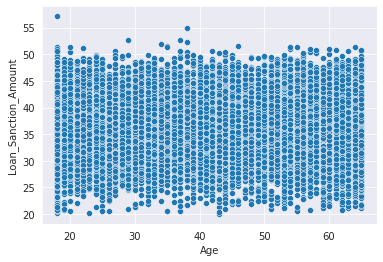

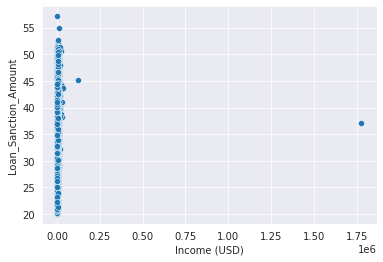

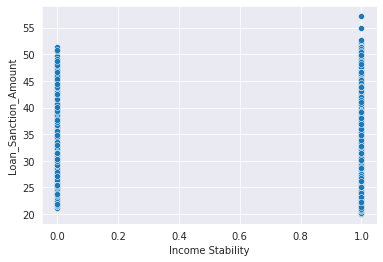

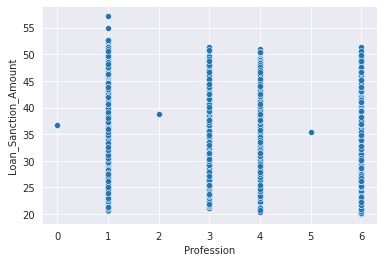

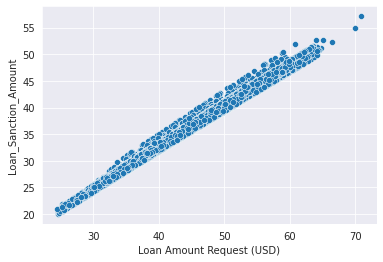

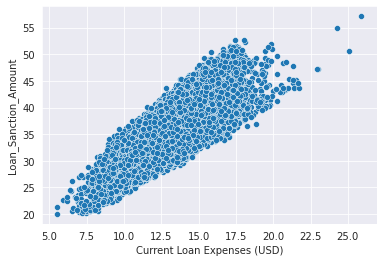

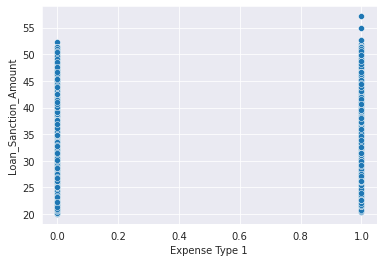

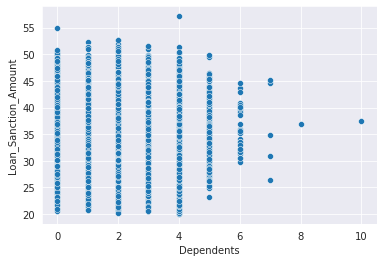

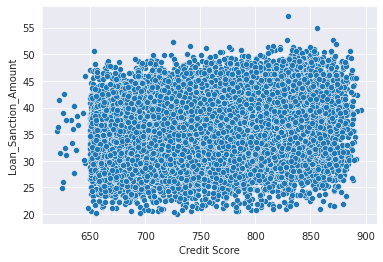

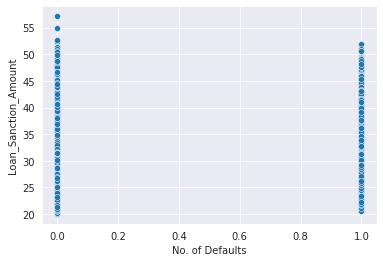

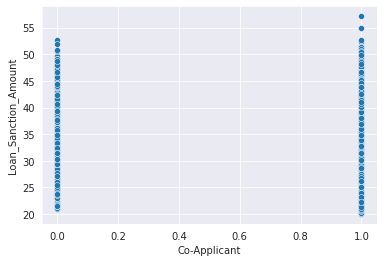

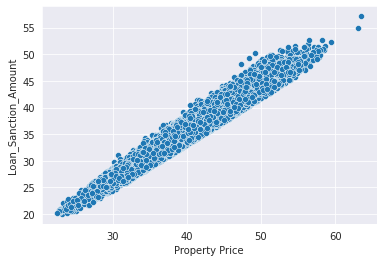

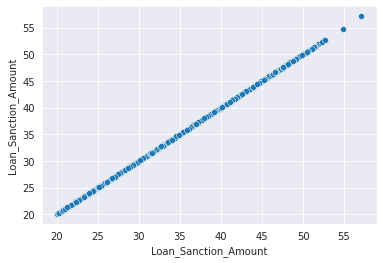

In [43]:
# Take a look on data-spread with respect to loan sanction amount.
for i, col in enumerate (df_2.columns):
    plt.figure(i)
    sns.scatterplot(x=df_2[col],y=df_2['Loan_Sanction_Amount'])

# Model creation

In [44]:
X = df_2.drop('Loan_Sanction_Amount',axis=1)
Y = df_2.Loan_Sanction_Amount

In [45]:
# storing column names in cols, since column names are (annoyingly) lost after scaling (the df is converted to a numpy array)
from sklearn.preprocessing import scale
cols=X.columns
X=pd.DataFrame(scale(X))
X.columns=cols
X.columns

Index(['Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Dependents', 'Credit Score', 'No. of Defaults',
       'Co-Applicant', 'Property Price'],
      dtype='object')

In [46]:
# Split the data into train and test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

- our main task is to predict ,hence it's regression problem. 
- Hence we have to apply regresion algorithm to solve our problem.
- There are many regression methods like Linear Regression , Ridge Regression ,Lasso Regression , Random Forest Regressor and many more.
- But fortunately Linear Regression gives us excellent result , this is because of preprocessing ; inshort it's the power of rectify the skewness and outliers inside the data.

In [47]:
# Linear Regression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)

y_pred_test=reg.predict(x_test)
y_pred_train=reg.predict(x_train)

from sklearn.metrics import r2_score

print(f"R-sqaure on train data: {r2_score(y_train, y_pred_train)}")
print(f"R-sqaure on test data: {r2_score(y_test, y_pred_test)}")

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print(f"RMSE on train data: {(((error_train**2).mean())**0.5)}")
print(f"RMSE on test data: {(((error_test**2).mean())**0.5)}")

R-sqaure on train data: 0.9926714296374096
R-sqaure on test data: 0.9927209046596128
RMSE on train data: 0.4730678029777858
RMSE on test data: 0.47124445188571196


In [48]:
# Predicting the charges
y_test_pred = reg.predict(x_test)
# Comparing the actual output values with the predicted values
test_ = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
test_.head(10)

,Actual,Predicted
22224,39.713230,39.935550
19464,42.106233,41.855542
20649,39.323236,38.443997
13710,31.681197,31.179430
12061,33.738173,34.281253
29551,35.750816,35.563986
27536,45.563315,45.626650
22099,32.386086,32.480392
50,36.477014,35.660996
15391,43.861125,44.113632


# Evaluation on Test Dataset

In [49]:
# import test data set
test_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cipla/dfb5e5f2c9bc11eb/dataset/test.csv')
test_data.rename(columns={'Customer ID': 'Customer_ID'},inplace=True) # rename the column
custum_Id = test_data.Customer_ID
# Drop the columns as like train data.
test_data=test_data.drop(['Property Location','Property Type','Expense Type 2','Property ID','Customer_ID','Name', 'Gender','Type of Employment','Location','Has Active Credit Card','Property Age'],1)
# test_data.head(3)

In [50]:
# Check the null values.
print(f"Missing Values :\n{test_data.isnull().sum()}")

Missing Values :
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Co-Applicant                      0
Property Price                    0
dtype: int64


In [51]:
# handle missing values in Income (USD)
test_data['Income (USD)'].interpolate(axis = 0,inplace=True)
test_data['Credit Score'].interpolate(axis = 0,inplace=True)
test_data['Current Loan Expenses (USD)'].interpolate(axis = 0,inplace=True)
test_data['Dependents'].fillna(0, inplace=True)
test_data['Income Stability'].fillna(test_data['Income Stability'].mode().iloc[0], inplace=True)

In [52]:
# Check the null values.
print(f"Missing Values :\n{test_data.isnull().sum()}")

Missing Values :
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Co-Applicant                   0
Property Price                 0
dtype: int64


In [53]:
#Encode the values in categorical data in to the numerical 
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
test_data["Income Stability"]=lc.fit_transform(test_data['Income Stability'])
test_data["Profession"]=lc.fit_transform(test_data['Profession'])
test_data["Expense Type 1"]=lc.fit_transform(test_data['Expense Type 1'])

In [54]:
# It's always good practise to save clean data in .csv file.
test_data.to_csv('test_sample.csv')

In [55]:
# Import the clean data
rectify_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cipla/test_sample.csv')

In [56]:
# Apply model for prediction.
test_predictions = reg.predict(rectify_data)

In [57]:
# Print the values.
test_result = pd.DataFrame({'Customer ID': custum_Id , 'Predicted': test_predictions})
test_result.head(5)

,Customer ID,Predicted
0,C-26247,749727.181674
1,C-35067,571882.268109
2,C-34590,966148.523151
3,C-16668,529319.498266
4,C-12196,601256.716863


In [58]:
# Save submission file.
test_result.to_csv('test_reult.csv')

Now predict price with data which is not available in dataset.

Example value : 

'Age'--> 18 , 25 , 34 , 54

'Income (USD)'-->3472.69 , 1184.87 , 255893

'Income Stability'--> 1 {Low} , 0 {High}

'Profession'--> 0 {Commercial associate} , 1 {Maternity leave} , 2 {Pensioner} , 3 {State servant} , 4 {Student} , 5 {Unemployed} , 6 {Working}

'Loan Amount Request (USD)'--> 137885.0 , 125987

'Current Loan Expenses (USD)'--> 258.3, 579.0

'Expense Type 1'--> 0 {N} , 1 {Y}

'Dependents'--> 0, 1 , 2 , 3 ,4 ...... 13

'Credit Score'-->833.9 , 620.7

'No. of Defaults'-->0 , 1

'Co-Applicant'--> 0 , 1

'Property Price'--> 236644.8 , 300999.45


In [59]:
# Apply model for unknown values.
reg.predict([[18,1000,0,3,12255.87,120,1,0,100,0,0,20000]])

array([66997.44812365])